<a href="https://colab.research.google.com/github/dcreeder89/Heart-Failure-Prediction-Data-Analysis/blob/main/Reeder__Heart_Failure_Prediction_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Prediction Data Analysis
- Christina Reeder
- Last updated: 2 February 2023

Goal of this project is to predict if a patient will contract a heart disease based on various factors. The dataset utilized is found [here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). And the Attribute information for the dataset is below:

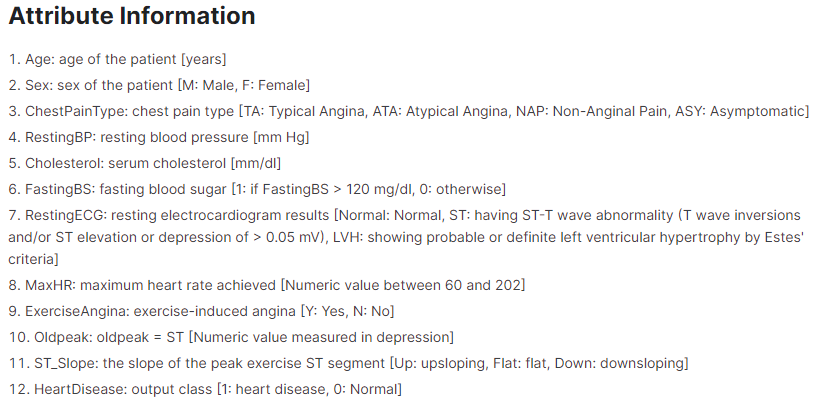

In [115]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, classification_report,\
recall_score

In [116]:
## filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## Create a function to evaluate the models

In [117]:
def evaluate_model(model_pipe):
  # use model to predict training and testing values
  train_pred = model_pipe.predict(X_train)
  test_pred = model_pipe.predict(X_test)
  
  # print classification report for training and testing data
  print('Training Data:')
  print(classification_report(y_train, train_pred))
  print('\nTesting Data:')
  print(classification_report(y_test, test_pred))

  # display confusion matrix for test data
  labels=['No Heart Disease', 'Heart Disease']
  print('\nTest Confusion Matrix:')
  ConfusionMatrixDisplay.from_predictions(y_test, test_pred, 
                                          cmap='Blues', display_labels=labels)

In [118]:
def evaluate_eng_model(model_pipe):
  # use model to predict training and testing values
  train_pred = model_pipe.predict(X_eng_train)
  test_pred = model_pipe.predict(X_eng_test)
  
  # print classification report for training and testing data
  print('Training Data:')
  print(classification_report(y_eng_train, train_pred))
  print('\nTesting Data:')
  print(classification_report(y_eng_test, test_pred))

  # display confusion matrix for test data
  labels=['No Heart Disease', 'Heart Disease']
  print('\nTest Confusion Matrix:')
  ConfusionMatrixDisplay.from_predictions(y_eng_test, test_pred, 
                                          cmap='Blues', display_labels=labels)

## Import, Examine, and Explore Dataset

### Import and Examine Data

In [119]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRj-4vMvk8k0WT-Ayif1M_gTLOzojgQ7UP_ujcJRSChVDUUrjYNvXkQuHnZplDwKJ0Yqht5p8Ezkbiy/pub?gid=223378998&single=true&output=csv'
df = pd.read_csv(url)

In [120]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Clean and Explore the Dataset

Tasks:
- Deleted unnecessary columns.
  - There are no unnecessary columns identified in this dataset. I believe that all columns can add to our machine learning algorithm. 
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. -Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
  - Completed with the generation of univariate visuals for numerical features. 
- Clearly commented all of your cleaning steps and described any decisions you made.
  - Completed amongst the other tasks.

#### Delete duplicate rows

In [121]:
# count number of duplicate rows
df.duplicated().sum()

0

> There are no duplicate rows in this dataset.

#### ID and Address Missing Values

In [122]:
# calculate sum of all missing values in the rows of the dataset
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

> There are no missing values in this dataset

#### ID and Correct inconsistencies in categorical values

Categorical columns are:
- Sex
- ChestPainType
- FastingsBS (numerical values, but binary categories of either 1 or 0)
- RestingECG
- ExerciseAngina
- ST_Slope
- HeartDisease (numerical values, but binary categories of either 1 or 0)

In [123]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [124]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [125]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [126]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [127]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [128]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [129]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

> When comparing the value_counts() to the information provided in the Attribute Information on kaggle.com, there are no inconsistencies in any of the categorical columns.

#### Produce univariate visuals for target and all features, and ID outliers

##### 'Age' column

> Boxplot

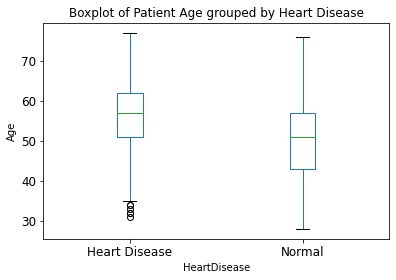

In [130]:
# copy dataframe and replace binary values with actual labels
age_df = df.copy()
age_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# display boxplot
age_df.boxplot('Age', by='HeartDisease',
           fontsize=12,
           grid=False);
plt.suptitle('');
plt.title('Boxplot of Patient Age grouped by Heart Disease');
plt.ylabel('Age');

> The majority of patients with heart disease are a higher age range than those without heart disease. There is There is a larger spread of age in patients without heart disease, than in patients with it.

> There are outliers in the lower ages for the patients with heart disease. 

##### 'Sex' column

> Bar chart

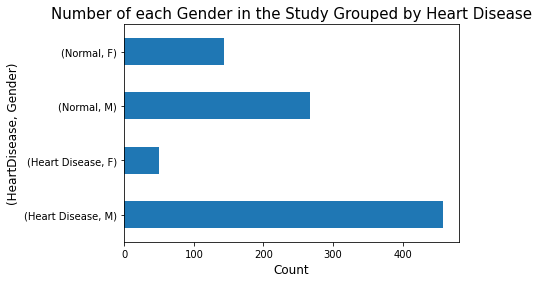

In [131]:
# copy dataframe and replace binary values with actual labels
sex_df = df.copy()
sex_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# Count number of each sex
sex_counts = sex_df.groupby('HeartDisease')['Sex'].value_counts()
# Plot counts of sexes
sex_counts.plot(kind='barh')
plt.title('Number of each Gender in the Study Grouped by Heart Disease', fontsize=15)
plt.ylabel('(HeartDisease, Gender)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

> There are significantly more males in the heart failure prediction dataset than there are females. The diference in count between males and females without heart disease is less than the difference between those with heart disease. More males than females are diagnosed with heart disease. 

##### 'ChestPainType' column

> Bar chart

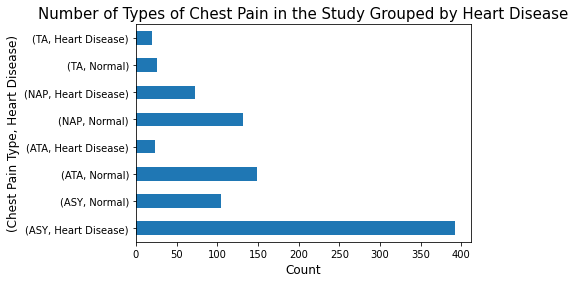

In [132]:
# copy dataframe and replace binary values with actual labels
cpain_df = df.copy()
cpain_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# Count number of each sex
cpain_counts = cpain_df.groupby('ChestPainType')['HeartDisease'].value_counts()
# Plot counts of sexes
cpain_counts.plot(kind='barh')
plt.title('Number of Types of Chest Pain in the Study Grouped by Heart Disease', fontsize=15)
plt.ylabel('(Chest Pain Type, Heart Disease)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

> Chest pain types of TA, NAP and ATA have less patient without heart disease than with. Whereas, the ASY type chest pain has more patients with heart disease than without. 

##### 'RestingBP' column

> Boxplot

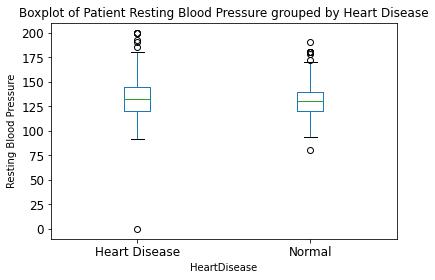

In [133]:
# copy dataframe and replace binary values with actual labels
bp_df = df.copy()
bp_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# display boxplot
bp_df.boxplot('RestingBP', by='HeartDisease',
           fontsize=12,
           grid=False);
plt.suptitle('');
plt.title('Boxplot of Patient Resting Blood Pressure grouped by Heart Disease');
plt.ylabel('Resting Blood Pressure');

> The median resting blood pressure for patients with and without heart disease is approximately the same value. The standard range for resting blood pressure for patients with and without heart disease is comparable.

> There are outliers in the high and low resting blood pressure for patients with and without heart disease. The lowest resting blood pressure, and largest outlier, is seen in a patient with heart disease at a value of 0 (this is most likely an error in the data since no alive person can have a blood pressure of 0).

##### 'Cholesterol' column

> Boxplot

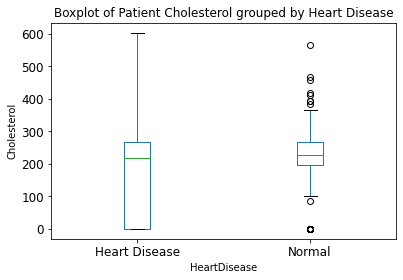

In [134]:
# copy dataframe and replace binary values with actual labels
chol_df = df.copy()
chol_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# display boxplot
chol_df.boxplot('Cholesterol', by='HeartDisease',
           fontsize=12,
           grid=False);
plt.suptitle('');
plt.title('Boxplot of Patient Cholesterol grouped by Heart Disease');
plt.ylabel('Cholesterol');

> There is a larger range of cholesterols in patients with heart disease than in those without heart disease. The median value of cholesterol is approximately the same in patients with and without heart disease.

> There are no outliers in patients with heart disese, and outliers both greater and less than the standard deviations in patients without heart disease. 

##### 'FastingBS' column

> Bar chart

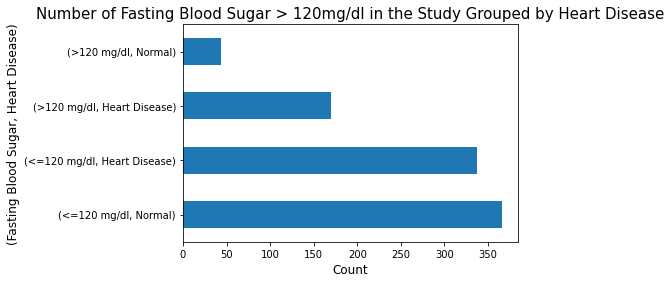

In [135]:
# copy dataframe and replace binary values with actual labels
fasting_df = df.copy()
fasting_df['FastingBS'].replace({1:'>120 mg/dl', 0:'<=120 mg/dl'}, inplace=True)
fasting_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# Count number of each sex
fasting_counts = fasting_df.groupby('FastingBS')['HeartDisease'].value_counts()
# Plot counts of sexes
fasting_counts.plot(kind='barh')
plt.title('Number of Fasting Blood Sugar > 120mg/dl in the Study Grouped by Heart Disease', fontsize=15)
plt.ylabel('(Fasting Blood Sugar, Heart Disease)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

> In patients with Fasting Blood Sugar > 120 mg/dl, there is a higher number of patients with heart disease than without. Whereas, in patients with Fasting Blood Sugar <= 120 mg/dl there is a slightly higher number of patients without heart disease than with. The difference between patients with and without heart disease is less in patients with fasting bs <= 120 mg/dl than in patients with fasting bs > 120 mg/dl.

##### 'RestingECG' column

> Bar chart

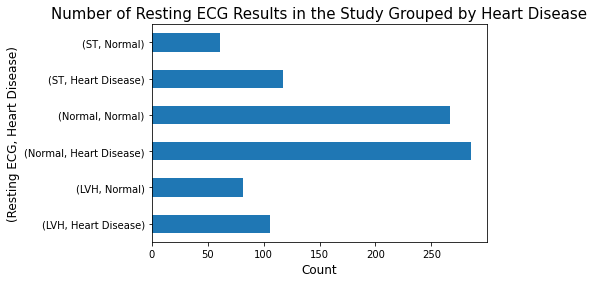

In [136]:
# copy dataframe and replace binary values with actual labels
ecg_df = df.copy()
ecg_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# Count number of each sex
ecg_counts = ecg_df.groupby('RestingECG')['HeartDisease'].value_counts()
# Plot counts of sexes
ecg_counts.plot(kind='barh')
plt.title('Number of Resting ECG Results in the Study Grouped by Heart Disease', fontsize=15)
plt.ylabel('(Resting ECG, Heart Disease)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

> The differences in patients with and without heart disease is around the same for all Resting ECG results. In all resting ecg results there is a higher number with heart disease than without heart disease. 

##### 'MaxHR' column

> Boxplot

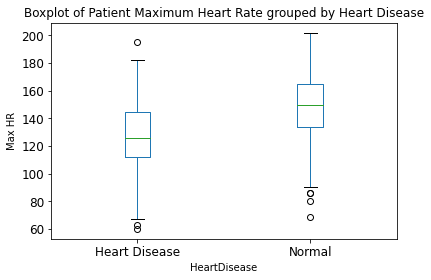

In [137]:
# copy dataframe and replace binary values with actual labels
hr_df = df.copy()
hr_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# display boxplot
hr_df.boxplot('MaxHR', by='HeartDisease',
           fontsize=12,
           grid=False);
plt.suptitle('');
plt.title('Boxplot of Patient Maximum Heart Rate grouped by Heart Disease');
plt.ylabel('Max HR');

> Max heart rate in patients without heart disease is higher on average than in patients with heart disease. The spreads for maximum heart rate is approximately the same ammount in patients with and without heart disease. 

> There are outliers in the maximum heart rate of both patients with and without heart disease. 

##### 'ExerciseAngina' column

> Bar chart

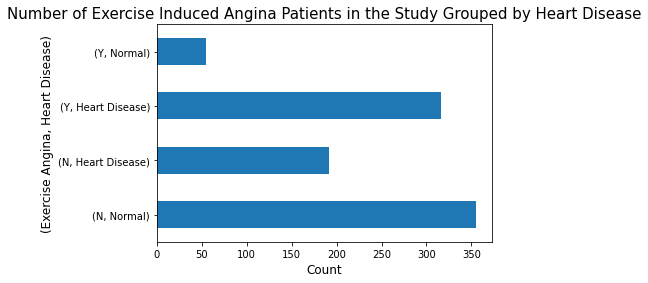

In [138]:
# copy dataframe and replace binary values with actual labels
angina_df = df.copy()
angina_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# Count number of each sex
angina_counts = angina_df.groupby('ExerciseAngina')['HeartDisease'].value_counts()
# Plot counts of sexes
angina_counts.plot(kind='barh')
plt.title('Number of Exercise Induced Angina Patients in the Study Grouped by Heart Disease', fontsize=15)
plt.ylabel('(Exercise Angina, Heart Disease)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

> There is a higher number of patients with heart disease in patients with exercise induced angina. Whereas there is a higher number of patiens without heart disease in patients without exercise induced angina. Therefore, this can be a possible indicator of heart disease in patients. 

##### 'Oldpeak' column

> Boxplot

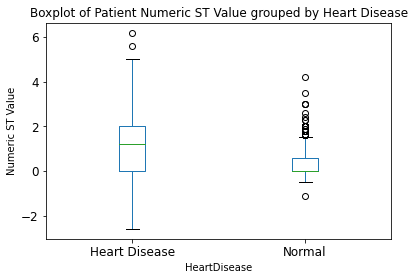

In [139]:
# copy dataframe and replace binary values with actual labels
peak_df = df.copy()
peak_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# display boxplot
peak_df.boxplot('Oldpeak', by='HeartDisease',
           fontsize=12,
           grid=False);
plt.suptitle('');
plt.title('Boxplot of Patient Numeric ST Value grouped by Heart Disease');
plt.ylabel('Numeric ST Value');

> There is a large variation in the Numeric ST value for patients with heart disease. The highest ST value in patients without heart disease (within the standard deviations) is lower than the median ST value in those with heart disease.

> There are many outliers in ST value for patients without heart disease since the rest of the data is very tightly grouped (this could lead to errors in our ML model later). There are only a couple outliers in the patients with heart disease. 

##### 'ST_Slope' column

> Bar chart



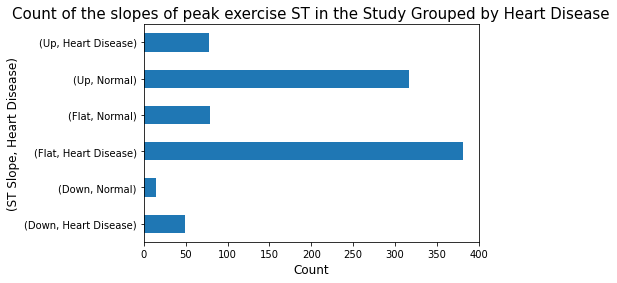

In [140]:
# copy dataframe and replace binary values with actual labels
st_df = df.copy()
st_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# Count number of each sex
st_counts = st_df.groupby('ST_Slope')['HeartDisease'].value_counts()
# Plot counts of sexes
st_counts.plot(kind='barh')
plt.title('Count of the slopes of peak exercise ST in the Study Grouped by Heart Disease', fontsize=15)
plt.ylabel('(ST Slope, Heart Disease)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

> Patients with a peak exercise ST segment slope that is flat or down have higher rates of heart disease than those with an upward slope. The patients with a flat slope have the highest ratio of heart disease to no heart disease. And the patients with a upward slope have the lowest ratio of heart disease to no heart disease. 

### Visualizations Exploration

#### Heatmap of correlations

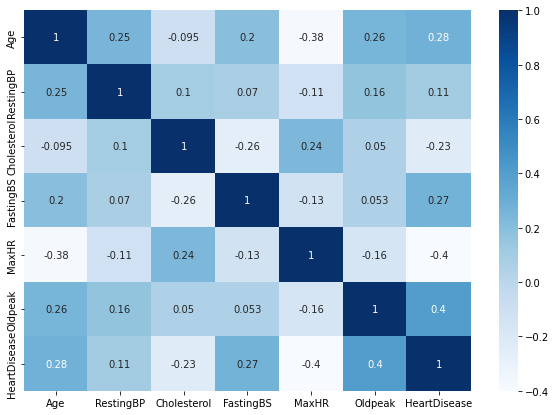

In [141]:
# calculate correlation coefficients 
corr = df.corr()
# produce heatmap with correlation displayed
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap='Blues', annot=True);

The strongest correlations between features are seen between the old peak and the risk for heart disease as well as between max heart rate and the risk for heart disease., though these are still only a moderate correlation of +/- 0.4. Another moderate correlation is seen between maximum heart rate and the age of the patient. No other features in this dataset have a correlation above +/- 0.3.

#### How does the max heart rate change with age?

> I am going to group ages into bins of 10 years so the plot isn't as cluttered. (Code found on [stack overflow](https://stackoverflow.com/questions/21441259/pandas-groupby-range-of-values))

In [142]:
# save a copy of the dataframe so we don't corrupt our dataset
df1 = df.copy()
# set bin limits and group names for the ages
bins = [0, 30, 40, 50, 60, 70, 100]
group_names = ['< 30', '30-39','40-49','50-59','60-69','> 70']
# create a new column with the ages grouped into bins of 10 years
df1['AgeGroups'] = pd.cut(df['Age'], bins, labels=group_names)

In [143]:
hr_mean = df1.groupby('AgeGroups')['MaxHR'].mean()
hr_mean

AgeGroups
< 30     177.400000
30-39    155.056818
40-49    144.757848
50-59    134.291339
60-69    125.609137
> 70     119.500000
Name: MaxHR, dtype: float64

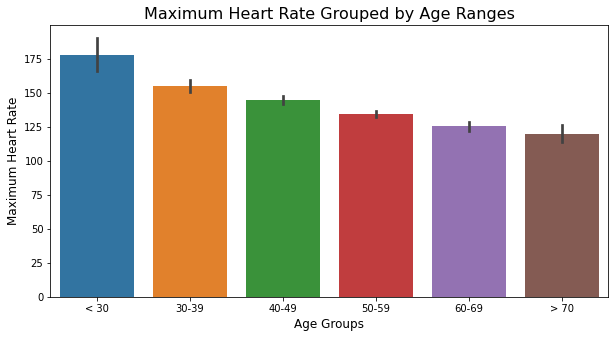

In [144]:
# Plot the barplot of age groups vs. heartrate
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df1, x='AgeGroups', y='MaxHR');
ax.set_title('Maximum Heart Rate Grouped by Age Ranges', fontsize=16);
ax.set_xlabel('Age Groups', fontsize=12);
ax.set_ylabel('Maximum Heart Rate', fontsize=12);

The visualization above shows that the average value for the maximum heart rate of the patients decreases as the patient's age increases. Maximum heart rate is a measure of the maximum heart rate the patient was able to achieve, and there is a definate correlation between the age of the patient and this heart rate. 

#### How does age range effect percent chance for heart disease?

In [145]:
disease_mean = df1.groupby('AgeGroups')['HeartDisease'].mean()
disease_mean*100

AgeGroups
< 30      0.000000
30-39    36.363636
40-49    41.704036
50-59    58.267717
60-69    73.604061
> 70     66.666667
Name: HeartDisease, dtype: float64

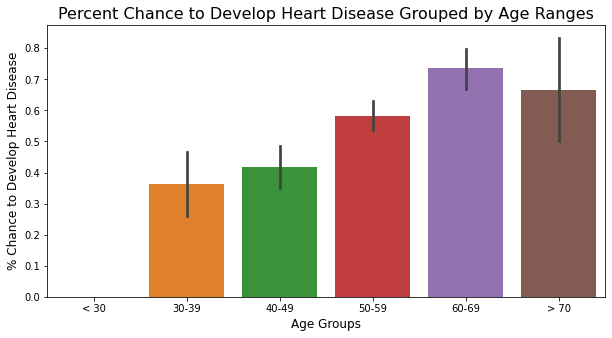

In [146]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df1, x='AgeGroups', y='HeartDisease');
ax.set_title('Percent Chance to Develop Heart Disease Grouped by Age Ranges', fontsize=16);
ax.set_xlabel('Age Groups', fontsize=12);
ax.set_ylabel('% Chance to Develop Heart Disease', fontsize=12);

The visualization above shows that the percentage risk for a heart disease in patients increases with time in an age range of 30 to 69 years. The risk then decreases on average when the patient is above 70 years old. 

#### Age Groups and sex vs. chance for heart disease

In [147]:
disease_sex_mean = df1.groupby(['AgeGroups','Sex'])['HeartDisease'].mean()
disease_sex_mean*100

AgeGroups  Sex
< 30       F       0.000000
           M       0.000000
30-39      F      21.052632
           M      40.579710
40-49      F      12.068966
           M      52.121212
50-59      F      28.571429
           M      64.951768
60-69      F      46.153846
           M      80.379747
> 70       F      16.666667
           M      83.333333
Name: HeartDisease, dtype: float64

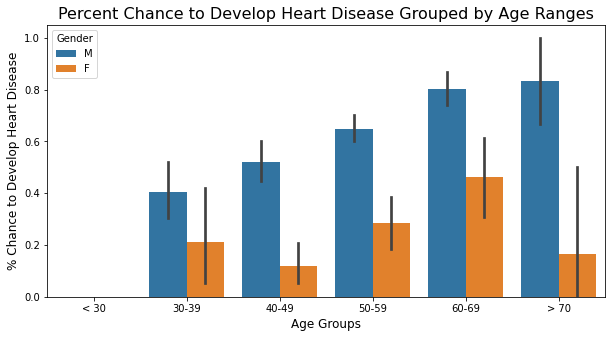

In [148]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df1, x='AgeGroups', y='HeartDisease', hue='Sex');
ax.set_title('Percent Chance to Develop Heart Disease Grouped by Age Ranges', fontsize=16);
ax.set_xlabel('Age Groups', fontsize=12);
ax.set_ylabel('% Chance to Develop Heart Disease', fontsize=12);
ax.legend(loc='upper left', title='Gender');

There is a significantly higher percent chance for male patients to develop a heart disease than female patients. The percent chance to develop heart disease increases as the age of the male patients increases. However, the chance of heart disease is highest in females in the age range of 60-69 and lowest in females in the age range of 40-49. 

#### Maximum HR groups vs percent chance for heart disease

In [149]:
df['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [150]:
# save a copy of the dataframe so we don't corrupt our dataset
df2 = df.copy()
# set bin limits and group names for the ages
bins = [0, 75, 100, 125, 150, 175, 200, 500]
group_names = ['< 75', '75-99','100-124','125-149','150-174','175-199', '> 200']
# create a new column with the ages grouped into bins of 10 years
df2['HRGroups'] = pd.cut(df['MaxHR'], bins, labels=group_names)

In [151]:
hr_disease_mean = df2.groupby('HRGroups')['HeartDisease'].mean()
hr_disease_mean*100

HRGroups
< 75       88.888889
75-99      77.631579
100-124    77.731092
125-149    55.520505
150-174    31.858407
175-199    15.686275
> 200       0.000000
Name: HeartDisease, dtype: float64

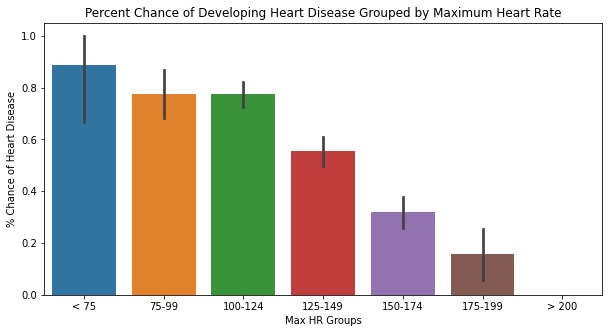

In [152]:
# Plot the barplot of age groups vs. heartrate
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df2, x='HRGroups', y='HeartDisease');
ax.set_title('Percent Chance of Developing Heart Disease Grouped by Maximum Heart Rate', fontsize=12);
ax.set_xlabel('Max HR Groups', fontsize=10);
ax.set_ylabel('% Chance of Heart Disease', fontsize=10);

This visualization shows that as the maximum heartrate the patient is able to achieve increases, the risk of heart disease decreases. This means that hearts that are able to achieve higher beats per minute are on average healthier than those that are not able. 

#### Combine this with the Max HR v Age Range visual

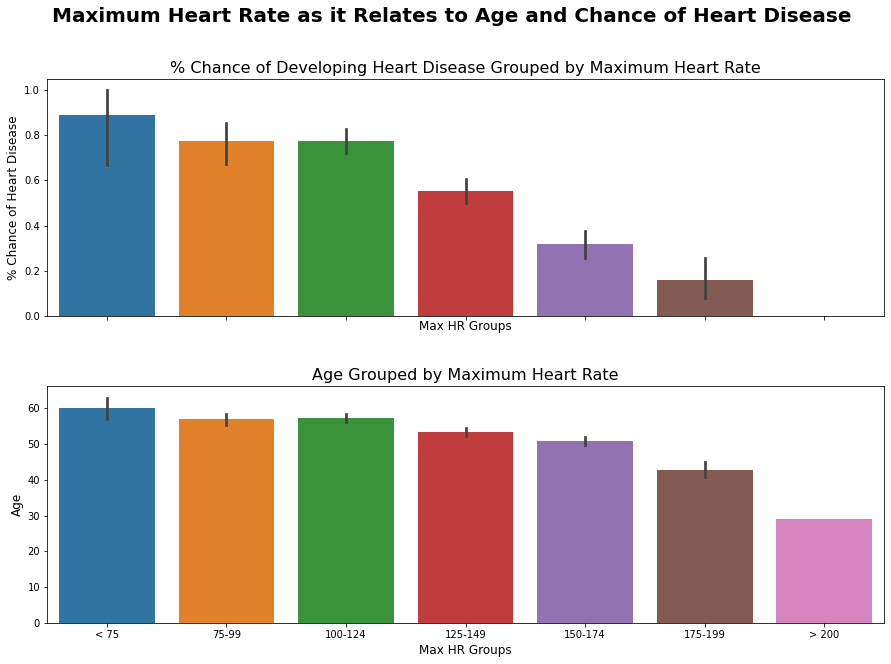

In [153]:
fig, ax = plt.subplots(2,1, figsize=(15,10), sharex=True)
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Maximum Heart Rate as it Relates to Age and Chance of Heart Disease', fontsize=20,
             fontweight='bold')
ax[0] = sns.barplot(ax = ax[0], data=df2, x='HRGroups', y='HeartDisease');
ax[0].set_title('% Chance of Developing Heart Disease Grouped by Maximum Heart Rate', fontsize=16);
ax[0].set_xlabel('Max HR Groups', fontsize=12);
ax[0].set_ylabel('% Chance of Heart Disease', fontsize=12);

ax[1] = sns.barplot(ax = ax[1], data=df2, x='HRGroups', y='Age');
ax[1].set_title('Age Grouped by Maximum Heart Rate', fontsize=16);
ax[1].set_xlabel('Max HR Groups', fontsize=12);
ax[1].set_ylabel('Age', fontsize=12);

### Final Visualizations

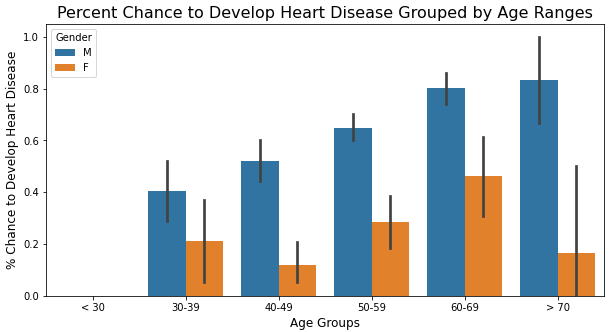

There is a significantly higher percent chance for male patients to develop a heart disease than female patients. The percent chance to develop heart disease increases as the age of the male patients increases. However, the chance of heart disease is highest in females in the age range of 60-69 and lowest in females in the age range of 40-49. 

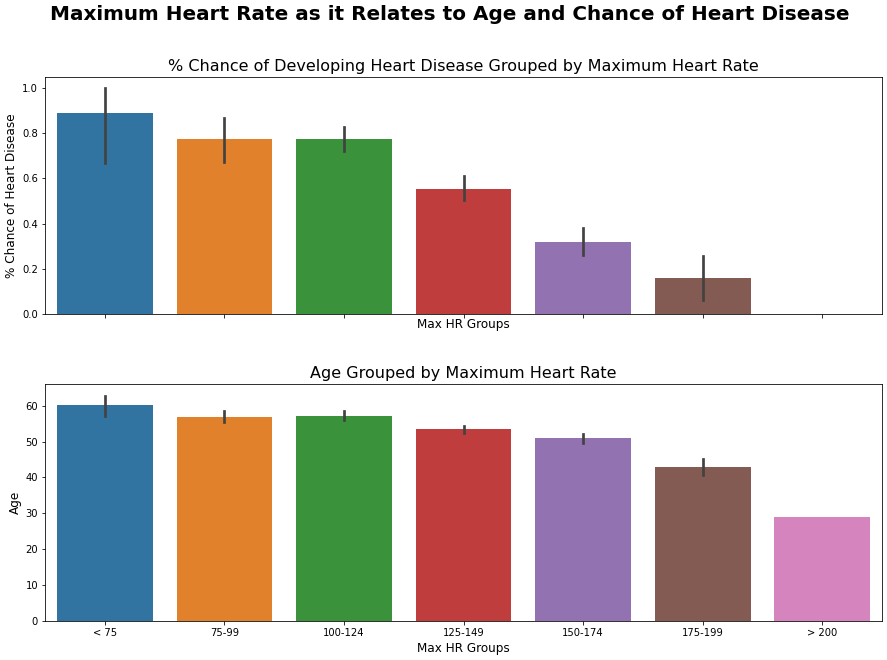

The top plot shows that the chance a patient will develop a heart disease decreases as the maximum heart rate achieved by that patient increases, meaning that the faster the heart is able to beat correlates to how healthy that heart is. The bottom plot shows that the maximum heart rate achieved by a patient decreases with the age of the patient. This leads me to the conclusion that older patients are at a higher risk for heart disease than younger patients on average. 

## Model Development without PCA and Feature Engineering

For our model:
- 0: No heart disease in the patient
- 1: Heart disease in the patient

I will prioritize minimizing type 2 errors. These are the errors in which a patient with heart disease is predicted to not have a heart disease. A patient being given a false negative prognosis will preclude them from receiving treatment they may otherwise need to save their life. 

Because we are prioritizing reducing false negatives, we will prioritize improving the recall score for our production model.

### Preprocessing pipelines

- Ordinal Encoding (columns with ordinally categorical features that can be encoded directly):
  - ExerciseAngina: 'Y':1, 'N':0
- One Hot Encoding (categorical columns that are not ordinal and need to be one-hot-encoded. These columns will be encoded inside a categorical pipeline inside our models.):
  - Sex
  - ChestPainType
  - RestingECG
  - ST_Slope
- All other columns are numerical and do not require encoding. They will instead be scaled (if the model requires) inside a numerical pipeline inside our models.

#### Categorical Columns

In [154]:
# ordinal encode the 'ExerciseAngina' column
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'Y':1,'N':0})
df['ExerciseAngina'].value_counts()

0    547
1    371
Name: ExerciseAngina, dtype: int64

In [155]:
# instantiate a column selector for categorical columns
cat_selector = make_column_selector(dtype_include='object')
# instantiate a frequency imputer (if future data has missing values in categorical columns)
freq_imputer = SimpleImputer(strategy='most_frequent')
# instantiate one hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# instantiate categorical pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)
# instantiate tuple for use in preprocessing
cat_tuple = (cat_pipe, cat_selector)

> I have created a SimpleImputer with the strategy of 'most_frequent' for the categorical columns. Though the current dataset has no missing values, this will allow the models to be able to handle missing values should the future data require it. I chose the strategy of 'most_frequent' since it will take the most used value in that column and fill blanks in the categorical columns with that value prior to one hot encoding.

#### Numerical Columns

I am going to create two preprocessing pipelines that we can choose between: 
- StandardScaler included
- StandardScaler excluded

This will allow me the choice, depending on the model utilized, as to whether we require the data to be scaled or not. 

In [156]:
# instantiate column selector for numerical columns
num_selector = make_column_selector(dtype_include='number')
# instantiate imputer with strategy of 'mean' for numerical columns 
# (if future data has missing values in numerical columns)
mean_imputer = SimpleImputer(strategy='mean')
# instantiate scaler
scaler = StandardScaler()

In [157]:
# instantiate numerical pipeline with the scaler
num_pipe_scaled = make_pipeline(mean_imputer, scaler)
# instantiate tuple with scaler 
num_tuple_scaled = (num_pipe_scaled, num_selector)

In [158]:
# instantiate tuple without scaler
num_tuple_not_scaled = (mean_imputer, num_selector)

> I have created a SimpleImputer with the strategy of 'mean' for the numerical  columns. Though the current dataset has no missing values, this will allow the models to be able to handle missing values should the future data require it. I chose the strategy of 'mean' since it will take the mean value in that column and fill blanks in the numerical columns with that value during preprocessing.

#### Creating preprocessors 

In [159]:
# create preprocessor with the scaler
preprocessor_scaled = make_column_transformer(cat_tuple, num_tuple_scaled, remainder='passthrough')

In [160]:
# create preprocessor without the scaler
preprocessor_not_scaled = make_column_transformer(cat_tuple, num_tuple_not_scaled, remainder='passthrough')

### Split data into features and target, and train test split

In [161]:
# split data  into features matrix and target vector
X = df.drop(columns='HeartDisease').copy()
y = df['HeartDisease'].copy()
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [162]:
# check head of X_train
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
155,56,M,ASY,155,342,1,Normal,150,1,3.0,Flat
362,56,M,NAP,155,0,0,ST,99,0,0.0,Flat
869,59,M,NAP,150,212,1,Normal,157,0,1.6,Up
101,51,M,ASY,130,179,0,Normal,100,0,0.0,Up
199,57,F,TA,130,308,0,Normal,98,0,1.0,Flat


### Logistic Regression Model

#### Default parameters

First we will explore the model without hyperparameter tuning

Training Data:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       312
           1       0.87      0.90      0.88       376

    accuracy                           0.87       688
   macro avg       0.87      0.87      0.87       688
weighted avg       0.87      0.87      0.87       688


Testing Data:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230


Test Confusion Matrix:


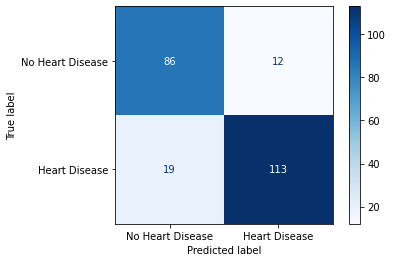

In [163]:
# instantiate Logistic Regression model
logreg = LogisticRegression(random_state=42)
# make pipeline with model and preprocessor with scaling
logreg_pipe = make_pipeline(preprocessor_scaled, logreg)
# fit to training data
logreg_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(logreg_pipe)

#### L1 Tuning

In [164]:
# create list of c values and an empty list for scores and recalls
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

train_recall = []
test_recall = []
# iterative over c values
for c in c_values:
  # instantiate model, create pipeline, and fit to training data
  logreg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', 
                              penalty='l1', random_state=42)
  logreg_pipe=make_pipeline(preprocessor_scaled, logreg)
  logreg_pipe.fit(X_train, y_train)

  # predict training and testing outcomes with the fit model
  train_pred = logreg_pipe.predict(X_train)
  test_pred = logreg_pipe.predict(X_test)

  # add training and testing scores to scores list
  train_scores.append(logreg_pipe.score(X_train, y_train))
  test_scores.append(logreg_pipe.score(X_test, y_test))

  # add training and testing recalls to recalls lists
  train_recall.append(recall_score(y_train, train_pred))
  test_recall.append(recall_score(y_test, test_pred))

{0.0001: 0.4260869565217391,
 0.001: 0.4260869565217391,
 0.01: 0.6782608695652174,
 0.1: 0.8652173913043478,
 1: 0.8652173913043478,
 10: 0.8608695652173913,
 100: 0.8608695652173913,
 1000: 0.8608695652173913}

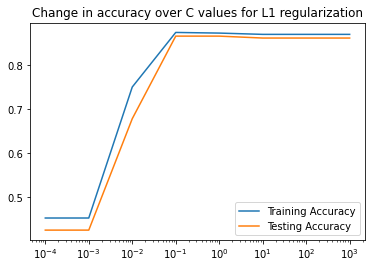

In [165]:
# plot change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'Training Accuracy')
ax.plot(c_values, test_scores, label = 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for L1 regularization')
ax.legend()
# set x axis to log scale
ax.set_xscale('log')
# print dictionary of values of c and scores for test set
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.0,
 0.001: 0.0,
 0.01: 0.5378787878787878,
 0.1: 0.8484848484848485,
 1: 0.8560606060606061,
 10: 0.8484848484848485,
 100: 0.8484848484848485,
 1000: 0.8484848484848485}

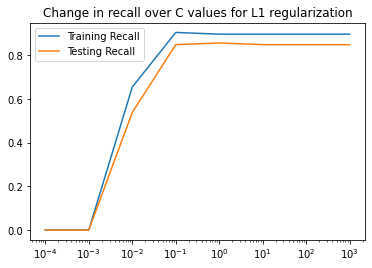

In [166]:
# plot change in recall as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_recall, label = 'Training Recall')
ax.plot(c_values, test_recall, label = 'Testing Recall')
ax.set_xticks(c_values)
ax.set_title('Change in recall over C values for L1 regularization')
ax.legend()
# set x axis to log scale
ax.set_xscale('log')
# print dictionary of values of c and scores for test set
{c:recall for c, recall in zip(c_values, test_recall)}

> C = 1 provides the highest recall and accuracy for the L1 tunining of the logistic regression model
- Accuracy: 86.5%
- Recall: 85.6%

#### L2 Tuning

In [167]:
# create list of c values and an empty list for scores and recalls
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

train_recall = []
test_recall = []
# iterative over c values
for c in c_values:
  # instantiate model, create pipeline, and fit to training data
  logreg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', 
                              penalty='l2', random_state=42)
  logreg_pipe=make_pipeline(preprocessor_scaled, logreg)
  logreg_pipe.fit(X_train, y_train)

  # predict training and testing outcomes with the fit model
  train_pred = logreg_pipe.predict(X_train)
  test_pred = logreg_pipe.predict(X_test)

  # add training and testing scores to scores list
  train_scores.append(logreg_pipe.score(X_train, y_train))
  test_scores.append(logreg_pipe.score(X_test, y_test))

  # add training and testing recalls to recalls lists
  train_recall.append(recall_score(y_train, train_pred))
  test_recall.append(recall_score(y_test, test_pred))

{0.0001: 0.8260869565217391,
 0.001: 0.8347826086956521,
 0.01: 0.8521739130434782,
 0.1: 0.8739130434782608,
 1: 0.8652173913043478,
 10: 0.8608695652173913,
 100: 0.8608695652173913,
 1000: 0.8608695652173913}

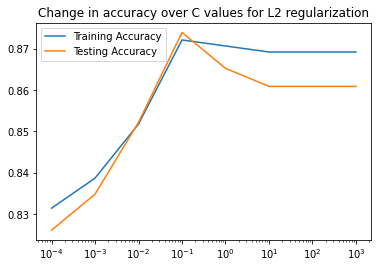

In [168]:
# plot change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'Training Accuracy')
ax.plot(c_values, test_scores, label = 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for L2 regularization')
ax.legend()
# set x axis to log scale
ax.set_xscale('log')
# print dictionary of values of c and scores for test set
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.8333333333333334,
 0.001: 0.8333333333333334,
 0.01: 0.8333333333333334,
 0.1: 0.8636363636363636,
 1: 0.8560606060606061,
 10: 0.8484848484848485,
 100: 0.8484848484848485,
 1000: 0.8484848484848485}

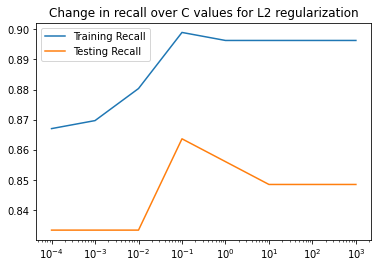

In [169]:
# plot change in recall as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_recall, label = 'Training Recall')
ax.plot(c_values, test_recall, label = 'Testing Recall')
ax.set_xticks(c_values)
ax.set_title('Change in recall over C values for L2 regularization')
ax.legend()
# set x axis to log scale
ax.set_xscale('log')
# print dictionary of values of c and scores for test set
{c:recall for c, recall in zip(c_values, test_recall)}

> C = 0.1 provides the highest recall and accuracy for the L1 tunining of the logistic regression model
- Accuracy: 87.4%
- Recall: 86.4%

#### Best Logistic Regression Model

> The best logistic regression model after hyperparameter tuning was with C = 0.1 and L2 Tuning. This model provided the highest accuracy and recall scores

Training Data:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       312
           1       0.87      0.90      0.88       376

    accuracy                           0.87       688
   macro avg       0.87      0.87      0.87       688
weighted avg       0.87      0.87      0.87       688


Testing Data:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        98
           1       0.91      0.86      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.88      0.87       230
weighted avg       0.88      0.87      0.87       230


Test Confusion Matrix:


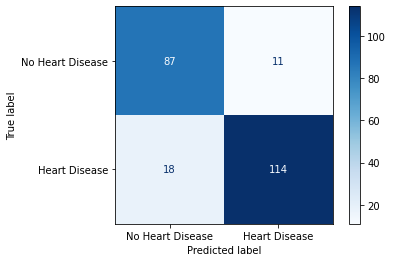

In [170]:
# instantiate tuned model, create pipeline, and fit to training data
logreg = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', 
                            penalty='l2', random_state=42)
logreg_pipe=make_pipeline(preprocessor_scaled, logreg)
logreg_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(logreg_pipe)

### KNN Classifier Model

#### Default Parameters

Training Data:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       312
           1       0.86      0.91      0.89       376

    accuracy                           0.88       688
   macro avg       0.88      0.87      0.87       688
weighted avg       0.88      0.88      0.87       688


Testing Data:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        98
           1       0.88      0.86      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230


Test Confusion Matrix:


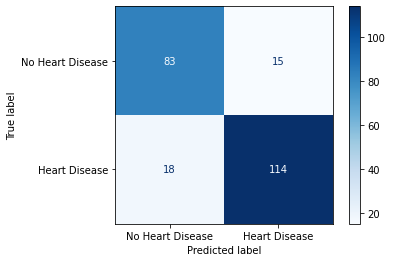

In [171]:
# instantiate Logistic Regression model
knn = KNeighborsClassifier()
# make pipeline with model and preprocessor with scaling
knn_pipe = make_pipeline(preprocessor_scaled, knn)
# fit to training data
knn_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(knn_pipe)

#### Tune n_neighbors parameter

In [172]:
# create list of n_neighbor values and an empty list for scores and recalls
neighbors = list(range(1,11))
train_scores = []
test_scores = []

train_recall = []
test_recall = []
# iterative over c values
for n in neighbors:
  # instantiate model, make pipeline, and fit on training data
  knn = KNeighborsClassifier(n_neighbors=n)
  knn_pipe=make_pipeline(preprocessor_scaled, knn)
  knn_pipe.fit(X_train, y_train)

  # predict outcomes using fit model
  train_pred = knn_pipe.predict(X_train)
  test_pred = knn_pipe.predict(X_test)

  # add training and testing scores to scores list
  train_scores.append(knn_pipe.score(X_train, y_train))
  test_scores.append(knn_pipe.score(X_test, y_test))

  # add training and testing recall scores to recall list
  train_recall.append(recall_score(y_train, train_pred))
  test_recall.append(recall_score(y_test, test_pred))

{1: 0.808695652173913,
 2: 0.8,
 3: 0.8565217391304348,
 4: 0.8434782608695652,
 5: 0.8565217391304348,
 6: 0.8608695652173913,
 7: 0.8652173913043478,
 8: 0.8695652173913043,
 9: 0.8695652173913043,
 10: 0.8391304347826087}

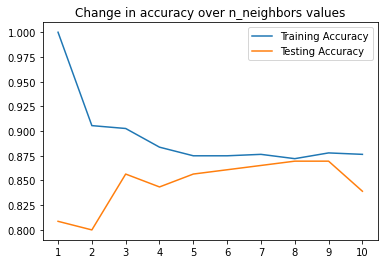

In [173]:
# plot change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(neighbors, train_scores, label = 'Training Accuracy')
ax.plot(neighbors, test_scores, label = 'Testing Accuracy')
ax.set_xticks(neighbors)
ax.set_title('Change in accuracy over n_neighbors values')
ax.legend()
# print dictionary of values of c and scores for test set
{n:score for n, score in zip(neighbors, test_scores)}

{1: 0.8106060606060606,
 2: 0.696969696969697,
 3: 0.8484848484848485,
 4: 0.7878787878787878,
 5: 0.8636363636363636,
 6: 0.8333333333333334,
 7: 0.8712121212121212,
 8: 0.8560606060606061,
 9: 0.8712121212121212,
 10: 0.8181818181818182}

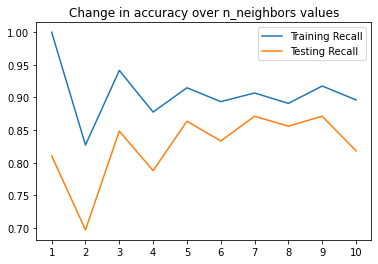

In [174]:
# plot change in recall as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(neighbors, train_recall, label = 'Training Recall')
ax.plot(neighbors, test_recall, label = 'Testing Recall')
ax.set_xticks(neighbors)
ax.set_title('Change in accuracy over n_neighbors values')
ax.legend()
# print dictionary of values of c and scores for test set
{n:recall for n, recall in zip(neighbors, test_recall)}

> A n_neighbors value of 8 or 9 provides the highest accuracy score of 86.9%. However, n_neighbors=9 provides the highest recall score of 87.1%. Therefore, the optimized value for n_neighbors is 9.

#### Best KNN Model

Training Data:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       312
           1       0.87      0.92      0.89       376

    accuracy                           0.88       688
   macro avg       0.88      0.87      0.88       688
weighted avg       0.88      0.88      0.88       688


Testing Data:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        98
           1       0.90      0.87      0.88       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230


Test Confusion Matrix:


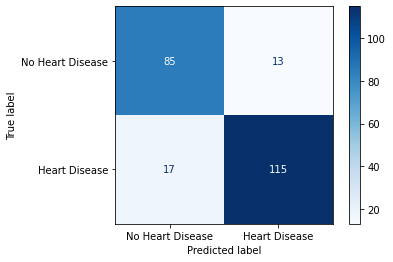

In [175]:
# instantiate optimized model, create pipeline, and fit to training data
knn = KNeighborsClassifier(n_neighbors=9)
knn_pipe=make_pipeline(preprocessor_scaled, knn)
knn_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(knn_pipe)

### Random Forest Classifier Model

#### Default Parameters

Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       376

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688


Testing Data:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        98
           1       0.92      0.87      0.89       132

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.89      0.88      0.88       230


Test Confusion Matrix:


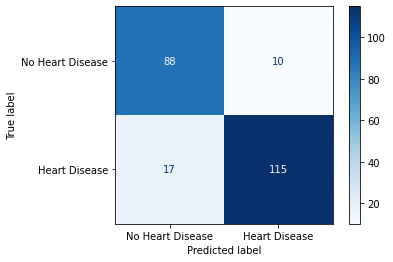

In [176]:
# instantiate Logistic Regression model
rf = RandomForestClassifier(random_state=42)
# make pipeline with model and preprocessor with scaling
rf_pipe = make_pipeline(preprocessor_scaled, rf)
# fit to training data
rf_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(rf_pipe)

In [177]:
# look at parameters of the default rf parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Tuning max_depth and n_estimators utilizing GridSearchCV

In [178]:
# determine the depth the default model utilized for max_depth
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
rf_depth = max(est_depths)
rf_depth

18

In [179]:
# instantiate random forest classifier model
rf = RandomForestClassifier(random_state=42)
# instantiate new training data that is put through the preprocessor
# for use in the grid search
X_train_processed = preprocessor_scaled.fit_transform(X_train)

# Create parameter grid for GridSearchCV
param_grid = {'max_depth': range(1,rf_depth),
              'n_estimators': [50, 100, 150, 200]}

# instantiate GridSearchCV
rf_grid_search = GridSearchCV(rf, param_grid)
# fit grid search to training data
rf_grid_search.fit(X_train_processed, y_train)
# examine best parameters found by search
rf_grid_search.best_params_

{'max_depth': 7, 'n_estimators': 50}

> Since I choose the values tested for the n_estimators value, I will try a different range of numbers to see if the same value of n_estimators=50 is the optimal selection.

In [180]:
# instantiate random forest classifier model
rf = RandomForestClassifier(random_state=42)
# instantiate new training data that is put through the preprocessor
# for use in the grid search
X_train_processed = preprocessor_scaled.fit_transform(X_train)

# Create parameter grid for GridSearchCV
param_grid = {'max_depth': range(1,rf_depth),
              'n_estimators': [25, 50, 75, 100]}

# instantiate GridSearchCV
rf_grid_search = GridSearchCV(rf, param_grid)
# fit grid search to training data
rf_grid_search.fit(X_train_processed, y_train)
# examine best parameters found by search
rf_grid_search.best_params_

{'max_depth': 7, 'n_estimators': 75}

> This GridSearchCV choose n_estimators=75 as the optimal number of estimators, but the same max_depth=7 as optimal. Therefore, I will create a loop with a range of n_estimators to fully optimize the model.

In [181]:
# create list of n_neighbor values and an empty list for scores and recalls
estimators = list(range(40, 81))
train_scores = []
test_scores = []

train_recall = []
test_recall = []
# iterative over c values
for e in estimators:
  # instantiate model, make pipeline, and fit on training data
  rf=RandomForestClassifier(random_state=42, max_depth=7,
                            n_estimators=e)
  rf_pipe = make_pipeline(preprocessor_scaled, rf)
  rf_pipe.fit(X_train, y_train)

  # predict outcomes using fit model
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)

  # add training and testing scores to scores list
  train_scores.append(rf_pipe.score(X_train, y_train))
  test_scores.append(rf_pipe.score(X_test, y_test))

  # add training and testing recall scores to recall list
  train_recall.append(recall_score(y_train, train_pred))
  test_recall.append(recall_score(y_test, test_pred))

{40: 0.8869565217391304,
 41: 0.8869565217391304,
 42: 0.8869565217391304,
 43: 0.8869565217391304,
 44: 0.8869565217391304,
 45: 0.8869565217391304,
 46: 0.8869565217391304,
 47: 0.8913043478260869,
 48: 0.8913043478260869,
 49: 0.8956521739130435,
 50: 0.8956521739130435,
 51: 0.8956521739130435,
 52: 0.8956521739130435,
 53: 0.8956521739130435,
 54: 0.8913043478260869,
 55: 0.8913043478260869,
 56: 0.8913043478260869,
 57: 0.8869565217391304,
 58: 0.8913043478260869,
 59: 0.8869565217391304,
 60: 0.8913043478260869,
 61: 0.8913043478260869,
 62: 0.8913043478260869,
 63: 0.8869565217391304,
 64: 0.8913043478260869,
 65: 0.8913043478260869,
 66: 0.8913043478260869,
 67: 0.8956521739130435,
 68: 0.8956521739130435,
 69: 0.8956521739130435,
 70: 0.8913043478260869,
 71: 0.8913043478260869,
 72: 0.8913043478260869,
 73: 0.8913043478260869,
 74: 0.8913043478260869,
 75: 0.8913043478260869,
 76: 0.8913043478260869,
 77: 0.8913043478260869,
 78: 0.8913043478260869,
 79: 0.8913043478260869,


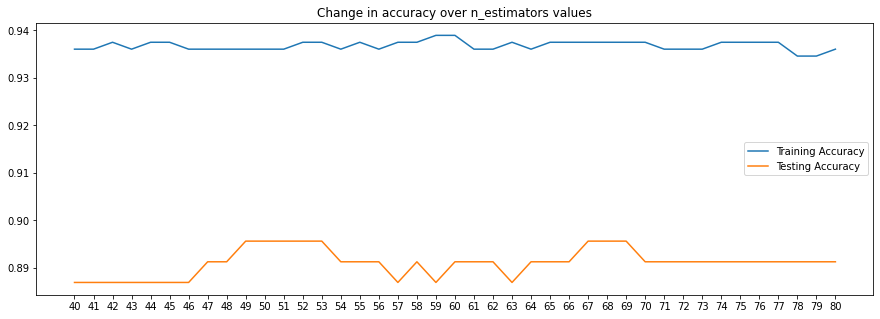

In [182]:
# plot change in accuracy as we change the value of n_estimators
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(estimators, train_scores, label = 'Training Accuracy')
ax.plot(estimators, test_scores, label = 'Testing Accuracy')
ax.set_xticks(estimators)
ax.set_title('Change in accuracy over n_estimators values')
ax.legend()
# print dictionary of values of c and scores for test set
{n:score for n, score in zip(estimators, test_scores)}

{40: 0.8863636363636364,
 41: 0.8863636363636364,
 42: 0.8863636363636364,
 43: 0.8863636363636364,
 44: 0.8863636363636364,
 45: 0.8863636363636364,
 46: 0.8863636363636364,
 47: 0.8863636363636364,
 48: 0.8939393939393939,
 49: 0.8939393939393939,
 50: 0.8939393939393939,
 51: 0.8939393939393939,
 52: 0.8939393939393939,
 53: 0.8939393939393939,
 54: 0.8939393939393939,
 55: 0.8939393939393939,
 56: 0.8939393939393939,
 57: 0.8863636363636364,
 58: 0.8939393939393939,
 59: 0.8863636363636364,
 60: 0.8939393939393939,
 61: 0.8939393939393939,
 62: 0.8939393939393939,
 63: 0.8863636363636364,
 64: 0.8939393939393939,
 65: 0.8939393939393939,
 66: 0.8939393939393939,
 67: 0.9015151515151515,
 68: 0.9015151515151515,
 69: 0.9015151515151515,
 70: 0.8939393939393939,
 71: 0.8939393939393939,
 72: 0.8939393939393939,
 73: 0.8939393939393939,
 74: 0.8939393939393939,
 75: 0.8939393939393939,
 76: 0.8939393939393939,
 77: 0.8939393939393939,
 78: 0.8939393939393939,
 79: 0.8939393939393939,


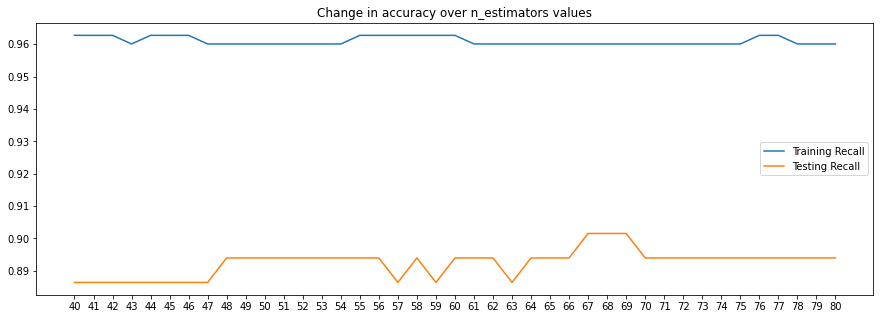

In [183]:
# plot change in recall as we change the value of C
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(estimators, train_recall, label = 'Training Recall')
ax.plot(estimators, test_recall, label = 'Testing Recall')
ax.set_xticks(estimators)
ax.set_title('Change in accuracy over n_estimators values')
ax.legend()
# print dictionary of values of c and scores for test set
{n:recall for n, recall in zip(estimators, test_recall)}

> A n_estimators value of 67-69 provides the highest accuracy score of 89.6%, and the highest recall score of 90.2%. Therefore, the optimized value for n_estimators is between 67-69.

#### Compare model performance with n_estimators=67-69

Training Data:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       312
           1       0.93      0.96      0.94       376

    accuracy                           0.94       688
   macro avg       0.94      0.94      0.94       688
weighted avg       0.94      0.94      0.94       688


Testing Data:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        98
           1       0.92      0.90      0.91       132

    accuracy                           0.90       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230


Test Confusion Matrix:


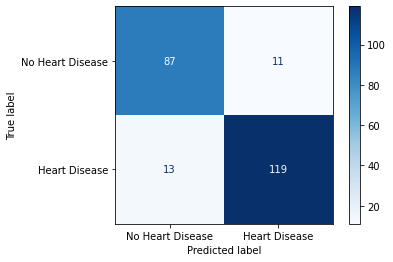

In [184]:
# instantiate random forest model with max_depth=7 and n_estimators=67
rf67=RandomForestClassifier(random_state=42, max_depth=7,
                          n_estimators=67)
rf67_pipe = make_pipeline(preprocessor_scaled, rf67)
rf67_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(rf67_pipe)

Training Data:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       312
           1       0.93      0.96      0.94       376

    accuracy                           0.94       688
   macro avg       0.94      0.94      0.94       688
weighted avg       0.94      0.94      0.94       688


Testing Data:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        98
           1       0.92      0.90      0.91       132

    accuracy                           0.90       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230


Test Confusion Matrix:


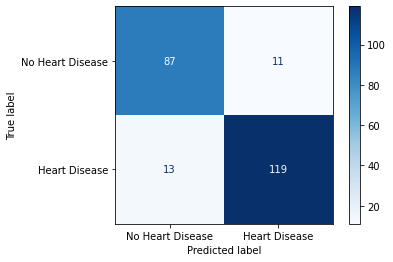

In [185]:
# instantiate random forest model with max_depth=7 and n_estimators=68
rf68=RandomForestClassifier(random_state=42, max_depth=7,
                          n_estimators=68)
rf68_pipe = make_pipeline(preprocessor_scaled, rf68)
rf68_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(rf68_pipe)

Training Data:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       312
           1       0.93      0.96      0.94       376

    accuracy                           0.94       688
   macro avg       0.94      0.94      0.94       688
weighted avg       0.94      0.94      0.94       688


Testing Data:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        98
           1       0.92      0.90      0.91       132

    accuracy                           0.90       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230


Test Confusion Matrix:


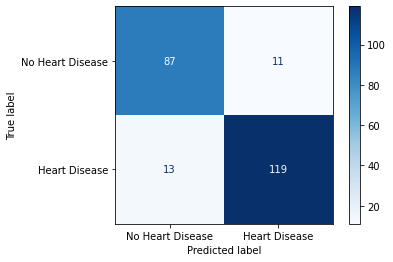

In [186]:
# instantiate random forest model with max_depth=7 and n_estimators=69
rf69=RandomForestClassifier(random_state=42, max_depth=7,
                          n_estimators=69)
rf69_pipe = make_pipeline(preprocessor_scaled, rf69)
rf69_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(rf69_pipe)

> The model performs exactly the same with n_estimators = 67-69. Therefore, I will set my optimal n_estimators = 69.

#### Best Random Forest Model

Training Data:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       312
           1       0.93      0.96      0.94       376

    accuracy                           0.94       688
   macro avg       0.94      0.94      0.94       688
weighted avg       0.94      0.94      0.94       688


Testing Data:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        98
           1       0.92      0.90      0.91       132

    accuracy                           0.90       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230


Test Confusion Matrix:


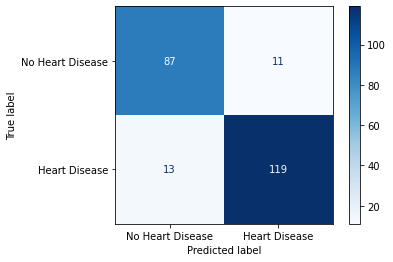

In [187]:
# instantiate random forest model with max_depth=7 and n_estimators=69
rf=RandomForestClassifier(random_state=42, max_depth=7,
                          n_estimators=69)
rf_pipe = make_pipeline(preprocessor_scaled, rf)
rf_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(rf_pipe)

## Model Development with PCA and Feature Engineering

### Testing best models with PCA

In [188]:
# instantiate PCA object that will retain 95% of the variance when transforming
pca = PCA(n_components=0.95)
# combine preprocessor and pca in pipeline
pca_pipe = make_pipeline(preprocessor_scaled, pca)

Training Data:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       312
           1       0.87      0.89      0.88       376

    accuracy                           0.87       688
   macro avg       0.87      0.87      0.87       688
weighted avg       0.87      0.87      0.87       688


Testing Data:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        98
           1       0.91      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230


Test Confusion Matrix:


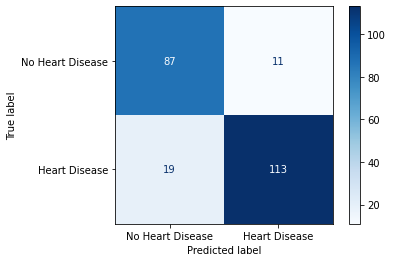

In [189]:
# test logistic regression model with pca
# create pipeline with optimal logreg model and pca
logreg_pca_pipe = make_pipeline(pca_pipe, logreg)
# fit to training data
logreg_pca_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(logreg_pca_pipe)

> The logistic regression model performed slightly worse (one more type 2 error) with the PCA than without.

Training Data:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       312
           1       0.86      0.90      0.88       376

    accuracy                           0.87       688
   macro avg       0.87      0.86      0.87       688
weighted avg       0.87      0.87      0.87       688


Testing Data:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        98
           1       0.90      0.85      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230


Test Confusion Matrix:


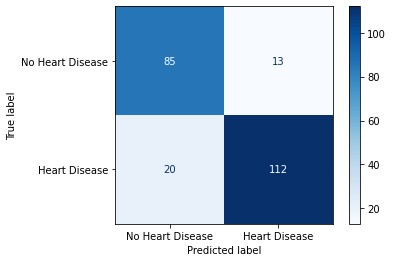

In [190]:
# test knn model with pca
# create pipeline with optimal knn model and pca
knn_pca_pipe = make_pipeline(pca_pipe, knn)
# fit to training data
knn_pca_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(knn_pca_pipe)

> The KNN model achieved a worse accuracy with the PCA than without.

Training Data:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       312
           1       0.95      0.97      0.96       376

    accuracy                           0.96       688
   macro avg       0.96      0.95      0.96       688
weighted avg       0.96      0.96      0.96       688


Testing Data:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        98
           1       0.90      0.85      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230


Test Confusion Matrix:


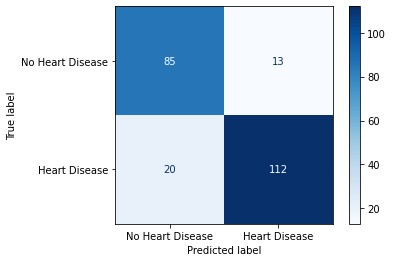

In [191]:
# test random forest model with pca
# create pipeline with optimal rf model and pca
rf_pca_pipe = make_pipeline(pca_pipe, rf)
# fit to training data
rf_pca_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(rf_pca_pipe)

> The random forest classifier model achieved an overall worse accuracy with the PCA than without.

### Optimizing PCA for Random Forest Classifier Model

I am going to loop through various values for PCA variance to check the recall scores and the optimizations for different data through the random forest model (our best performing model to this point). 

#### Testing various variances

In [192]:
# create list of pca variance values and an empty lists for scores and recalls
pca_var = np.array(range(85,98))/100
train_scores = []
test_scores = []

train_recall = []
test_recall = []
# iterative over variance values
for var in pca_var:
  # instantiate PCA object that will retain var of the variance when transforming
  pca = PCA(n_components=var)
  # combine preprocessor and pca in pipeline
  pca_pipe = make_pipeline(preprocessor_scaled, pca)

  # create pipeline with optimal rf model and pca
  rf_pca_pipe = make_pipeline(pca_pipe, rf)
  # fit to training data
  rf_pca_pipe.fit(X_train, y_train)

  # predict outcomes using fit model
  train_pred = rf_pca_pipe.predict(X_train)
  test_pred = rf_pca_pipe.predict(X_test)

  # add training and testing scores to scores list
  train_scores.append(rf_pca_pipe.score(X_train, y_train))
  test_scores.append(rf_pca_pipe.score(X_test, y_test))

  # add training and testing recall scores to recall list
  train_recall.append(recall_score(y_train, train_pred))
  test_recall.append(recall_score(y_test, test_pred))

{0.85: 0.8434782608695652,
 0.86: 0.8391304347826087,
 0.87: 0.8391304347826087,
 0.88: 0.8391304347826087,
 0.89: 0.8739130434782608,
 0.9: 0.8739130434782608,
 0.91: 0.8739130434782608,
 0.92: 0.8913043478260869,
 0.93: 0.8913043478260869,
 0.94: 0.8913043478260869,
 0.95: 0.8565217391304348,
 0.96: 0.8565217391304348,
 0.97: 0.8739130434782608}

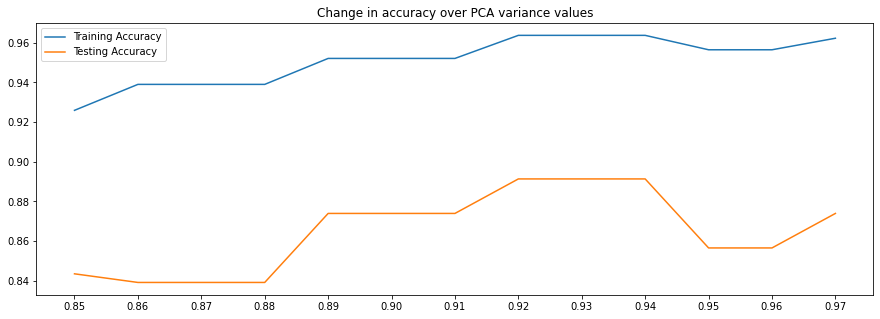

In [193]:
# plot change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(pca_var, train_scores, label = 'Training Accuracy')
ax.plot(pca_var, test_scores, label = 'Testing Accuracy')
ax.set_xticks(pca_var)
ax.set_title('Change in accuracy over PCA variance values')
ax.legend()
# print dictionary of values of c and scores for test set
{n:score for n, score in zip(pca_var, test_scores)}

{0.85: 0.8484848484848485,
 0.86: 0.8333333333333334,
 0.87: 0.8333333333333334,
 0.88: 0.8333333333333334,
 0.89: 0.8939393939393939,
 0.9: 0.8939393939393939,
 0.91: 0.8939393939393939,
 0.92: 0.9090909090909091,
 0.93: 0.9090909090909091,
 0.94: 0.9090909090909091,
 0.95: 0.8484848484848485,
 0.96: 0.8484848484848485,
 0.97: 0.8787878787878788}

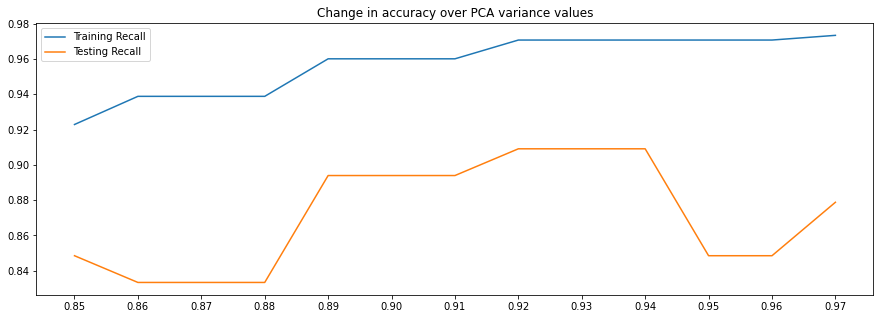

In [194]:
# plot change in recall as we change the value of C
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(pca_var, train_recall, label = 'Training Recall')
ax.plot(pca_var, test_recall, label = 'Testing Recall')
ax.set_xticks(pca_var)
ax.set_title('Change in accuracy over PCA variance values')
ax.legend()
# print dictionary of values of c and scores for test set
{n:recall for n, recall in zip(pca_var, test_recall)}

> PCA variances of 0.92 - 0.94 provide the highest values for accuracy and recall on the testing data. I will therefore use a variance value of 0.93 for my optimized model.

#### Optimized PCA and RF model

Training Data:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       312
           1       0.96      0.97      0.97       376

    accuracy                           0.96       688
   macro avg       0.96      0.96      0.96       688
weighted avg       0.96      0.96      0.96       688


Testing Data:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        98
           1       0.90      0.91      0.91       132

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230


Test Confusion Matrix:


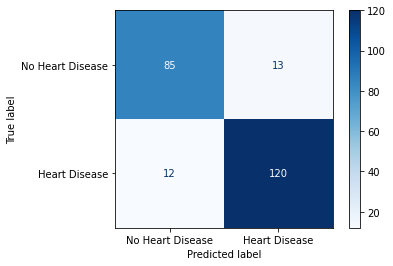

In [195]:
# instantiate PCA object that will retain var of the variance when transforming
pca = PCA(n_components=0.93)
# combine preprocessor and pca in pipeline
pca_pipe = make_pipeline(preprocessor_scaled, pca)

# create pipeline with optimal rf model and pca
rf_pca_pipe = make_pipeline(pca_pipe, rf)
# fit to training data
rf_pca_pipe.fit(X_train, y_train)
# evaluate model performance
evaluate_model(rf_pca_pipe)

> The random forest model utilizing PCA achieved one less false negative, and two more false positives than the random forest model without PCA. This led to a slightly lower overall accuracy for the PCA model, however a slightly better recall score. The model utilizing PCA also had higher accuracy and recall scores on the training data than the model without PCA, leading me to believe that utilizing PCA has slightly overfit this model to the training data.

### Feature Engineering

In [196]:
# Create a copy of the data frame to engineer features
# this will allow me to preserve the original dataframe
df_eng = df.copy()

#### Blood Pressure

Examining the values in the RestingBP column, the values given are the systolic (or upper) number on a blood pressure reading. I can engineer this feature to group the blood pressures into their ranges as shown below (health information found [here](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings) for the ranges):
- Normal : < 120 mmHg
- Elevated : 120 - 129 mmHg
- High, Stage 1: 130 - 139 mmHg
- High, Stage 2: 140 - 180 mmHg
- Hypertensive Crisis: > 180 mmHg

This data can be ordinally encoded with 'Normal':0, 'Elevated':1, 'High, Stage 1':2, 'High, Stage 2':3, 'Hypertensive Crisis':4. This ordinal encoding is due to the severity of the high blood pressure increases as the number increases.

In [197]:
# Create function to convert blood pressure numbers to the 
# ordinal encoded values given above
def bin_bp(bp):
  if bp < 120:
    return 0
  elif bp in range(120,130):
    return 1
  elif bp in range(130,140):
    return 2
  elif bp in range(140,181):
    return 3
  else:
    return 4

> Note: The original values in the 'RestingBP' column are data type int. This allowed me to use the range function in my conversion function since the integer values are all accounted for inside the range. 

In [198]:
# apply bin_bp() function to each item in the 'RestingBP' column
df_eng['RestingBP'] = df_eng['RestingBP'].apply(bin_bp)
# check values of the column
df_eng.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,3,289,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,3,180,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,2,283,0,ST,98,0,0.0,Up,0
3,48,F,ASY,2,214,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,3,195,0,Normal,122,0,0.0,Up,0


#### Cholesterol

Examining the values in the Cholesterol column, they are given as the total cholesterol (LDL and HDL). I can engineer this feature to group the cholesterols into their ranges as shown below (health information found [here](https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lipid-panel) for the ranges):
- Normal : < 200 mg/dL
- Borderline High: 200 - 239 mg/dL
- High: >= 240 mg/dL

This data can be ordinally encoded with 'Normal':0, 'Borderline High':1, 'High':2. This ordinal encoding is due to the severity of the high cholesterol increases as the number increases.

In [199]:
# Create function to convert cholesterol numbers to the 
# ordinal encoded values given above
def bin_chol(chol):
  if chol < 200:
    return 0
  elif chol in range(200, 240):
    return 1
  else:
    return 2

In [200]:
# apply bin_chol() function to each item in the 'Cholesterol' column
df_eng['Cholesterol'] = df_eng['Cholesterol'].apply(bin_chol)
# check values of the column
df_eng.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,3,2,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,3,0,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,2,2,0,ST,98,0,0.0,Up,0
3,48,F,ASY,2,1,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,3,0,0,Normal,122,0,0.0,Up,0


#### Sex & Age

I am going to group the patients sex and age columns into one column, rounding the age to the nearest tens place. This will decrease the variability in the ages and decrease the number of features with the grouping. This will be one hot encoded in my preprocessing, since the new column will be of datatype object. 

In [201]:
# Round Age column to the tens place
df_eng['Age'] = df_eng['Age'].round(-1)

In [202]:
# combine Age and Sex columns into single new column, and drop the individual columns
df_eng['GenderAge'] = df_eng['Sex'] + df_eng['Age'].astype('string')
df_eng.drop(columns=['Sex','Age'], inplace=True)
df_eng.head()

,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,GenderAge
0,ATA,3,2,0,Normal,172,0,0.0,Up,0,M40
1,NAP,3,0,0,Normal,156,0,1.0,Flat,1,F50
2,ATA,2,2,0,ST,98,0,0.0,Up,0,M40
3,ASY,2,1,0,Normal,108,1,1.5,Flat,1,F50
4,NAP,3,0,0,Normal,122,0,0.0,Up,0,M50


In [203]:
# convert 'GenderAge' column to type object for machine learning
df_eng['GenderAge'] = df_eng['GenderAge'].astype('object')
# check column data types
df_eng.dtypes

ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
GenderAge          object
dtype: object

#### Testing Models Using Dataframe with Engineered Features

In [204]:
# Split engineered dataframe into features and target
X_eng = df_eng.drop(columns = 'HeartDisease').copy()
y_eng = df_eng['HeartDisease'].copy()
# train test split
X_eng_train, X_eng_test, y_eng_train, y_eng_test = train_test_split(X_eng, y_eng, random_state=42)

##### Logistic Regression Model

###### L1 tuning

In [205]:
# create list of c values and an empty list for scores and recalls
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

train_recall = []
test_recall = []
# iterative over c values
for c in c_values:
  # instantiate model, create pipeline, and fit to training data
  logreg_eng = LogisticRegression(C=c, max_iter=1000, solver='liblinear', 
                              penalty='l1', random_state=42)
  logreg_eng_pipe=make_pipeline(preprocessor_scaled, logreg_eng)
  logreg_eng_pipe.fit(X_eng_train, y_eng_train)

  # predict training and testing outcomes with the fit model
  train_pred = logreg_eng_pipe.predict(X_eng_train)
  test_pred = logreg_eng_pipe.predict(X_eng_test)

  # add training and testing scores to scores list
  train_scores.append(logreg_eng_pipe.score(X_eng_train, y_eng_train))
  test_scores.append(logreg_eng_pipe.score(X_eng_test, y_eng_test))

  # add training and testing recalls to recalls lists
  train_recall.append(recall_score(y_eng_train, train_pred))
  test_recall.append(recall_score(y_eng_test, test_pred))

{0.0001: 0.4260869565217391,
 0.001: 0.4260869565217391,
 0.01: 0.6782608695652174,
 0.1: 0.8565217391304348,
 1: 0.8565217391304348,
 10: 0.8608695652173913,
 100: 0.8608695652173913,
 1000: 0.8608695652173913}

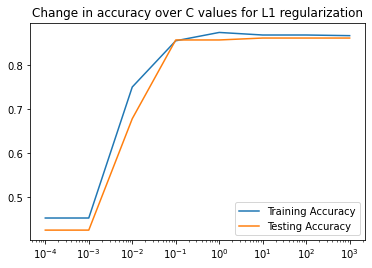

In [206]:
# plot change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'Training Accuracy')
ax.plot(c_values, test_scores, label = 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for L1 regularization')
ax.legend()
# set x axis to log scale
ax.set_xscale('log')
# print dictionary of values of c and scores for test set
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.0,
 0.001: 0.0,
 0.01: 0.5378787878787878,
 0.1: 0.8484848484848485,
 1: 0.8560606060606061,
 10: 0.8636363636363636,
 100: 0.8636363636363636,
 1000: 0.8636363636363636}

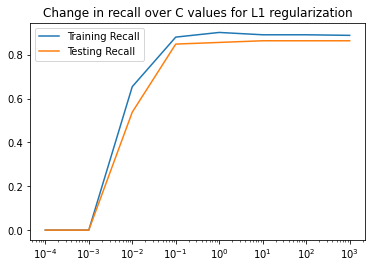

In [207]:
# plot change in recall as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_recall, label = 'Training Recall')
ax.plot(c_values, test_recall, label = 'Testing Recall')
ax.set_xticks(c_values)
ax.set_title('Change in recall over C values for L1 regularization')
ax.legend()
# set x axis to log scale
ax.set_xscale('log')
# print dictionary of values of c and scores for test set
{c:recall for c, recall in zip(c_values, test_recall)}

> C = 10 provides the highest recall and accuracy for the L1 tunining of the logistic regression model
- Accuracy: 86.1%
- Recall: 86.4%

###### L2 tuning

In [208]:
# create list of c values and an empty list for scores and recalls
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

train_recall = []
test_recall = []
# iterative over c values
for c in c_values:
  # instantiate model, create pipeline, and fit to training data
  logreg_eng = LogisticRegression(C=c, max_iter=1000, solver='liblinear', 
                              penalty='l2', random_state=42)
  logreg_eng_pipe=make_pipeline(preprocessor_scaled, logreg_eng)
  logreg_eng_pipe.fit(X_eng_train, y_eng_train)

  # predict training and testing outcomes with the fit model
  train_pred = logreg_eng_pipe.predict(X_eng_train)
  test_pred = logreg_eng_pipe.predict(X_eng_test)

  # add training and testing scores to scores list
  train_scores.append(logreg_eng_pipe.score(X_eng_train, y_eng_train))
  test_scores.append(logreg_eng_pipe.score(X_eng_test, y_eng_test))

  # add training and testing recalls to recalls lists
  train_recall.append(recall_score(y_eng_train, train_pred))
  test_recall.append(recall_score(y_eng_test, test_pred))

{0.0001: 0.8,
 0.001: 0.8043478260869565,
 0.01: 0.8347826086956521,
 0.1: 0.8565217391304348,
 1: 0.8565217391304348,
 10: 0.8608695652173913,
 100: 0.8608695652173913,
 1000: 0.8608695652173913}

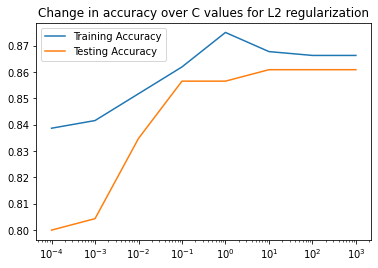

In [209]:
# plot change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'Training Accuracy')
ax.plot(c_values, test_scores, label = 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for L2 regularization')
ax.legend()
# set x axis to log scale
ax.set_xscale('log')
# print dictionary of values of c and scores for test set
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.7878787878787878,
 0.001: 0.7954545454545454,
 0.01: 0.8257575757575758,
 0.1: 0.8484848484848485,
 1: 0.8560606060606061,
 10: 0.8636363636363636,
 100: 0.8636363636363636,
 1000: 0.8636363636363636}

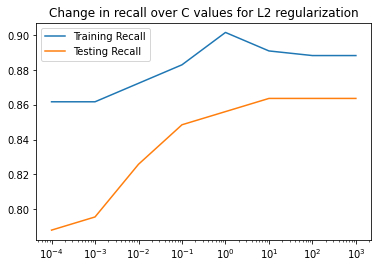

In [210]:
# plot change in recall as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_recall, label = 'Training Recall')
ax.plot(c_values, test_recall, label = 'Testing Recall')
ax.set_xticks(c_values)
ax.set_title('Change in recall over C values for L2 regularization')
ax.legend()
# set x axis to log scale
ax.set_xscale('log')
# print dictionary of values of c and scores for test set
{c:recall for c, recall in zip(c_values, test_recall)}

> C = 10 provides the highest recall and accuracy for the L2 tunining of the logistic regression model
- Accuracy: 86.1%
- Recall: 86.4%

These values are equivalent to the highest accuacy and recall during L1 tuning. 

###### Best Tuned Logistic Regression Model with Feature Engineering

Training Data:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       312
           1       0.87      0.89      0.88       376

    accuracy                           0.87       688
   macro avg       0.87      0.87      0.87       688
weighted avg       0.87      0.87      0.87       688


Testing Data:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        98
           1       0.89      0.86      0.88       132

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230


Test Confusion Matrix:


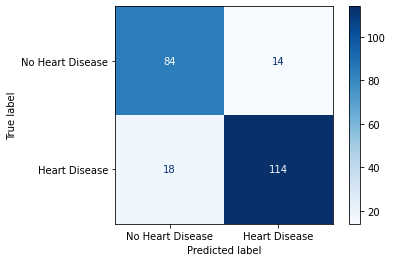

In [211]:
# instantiate tuned model, create pipeline, and fit to training data
logreg_eng = LogisticRegression(C=10, max_iter=1000, solver='liblinear', 
                            penalty='l2', random_state=42)
logreg_eng_pipe=make_pipeline(preprocessor_scaled, logreg_eng)
logreg_eng_pipe.fit(X_eng_train, y_eng_train)
# evaluate model performance
evaluate_eng_model(logreg_eng_pipe)

> The tuned logistic regression model with feature engineering on the dataframe does not perform as well as the model without feature engineering on the dataframe. 

##### KNN Model

###### Tuning n_neighbors

In [212]:
#create list of n_neighbor values and an empty list for scores and recalls
neighbors = list(range(1,11)) 
train_scores = [] 
test_scores = []

train_recall = [] 
test_recall = []

#iterative over c values
for n in neighbors:

  #instantiate model, make pipeline, and fit on training data
  knn_eng = KNeighborsClassifier(n_neighbors=n) 
  knn_eng_pipe=make_pipeline(preprocessor_scaled, knn_eng) 
  knn_eng_pipe.fit(X_eng_train, y_eng_train)

  #predict outcomes using fit model
  train_pred = knn_eng_pipe.predict(X_eng_train) 
  test_pred = knn_eng_pipe.predict(X_eng_test)

  #add training and testing scores to scores list
  train_scores.append(knn_eng_pipe.score(X_eng_train, y_eng_train)) 
  test_scores.append(knn_eng_pipe.score(X_eng_test, y_eng_test))

  #add training and testing recall scores to recall list
  train_recall.append(recall_score(y_eng_train, train_pred)) 
  test_recall.append(recall_score(y_eng_test, test_pred))

{1: 0.8434782608695652,
 2: 0.8,
 3: 0.8304347826086956,
 4: 0.8130434782608695,
 5: 0.8521739130434782,
 6: 0.8260869565217391,
 7: 0.8434782608695652,
 8: 0.8260869565217391,
 9: 0.8565217391304348,
 10: 0.8521739130434782}

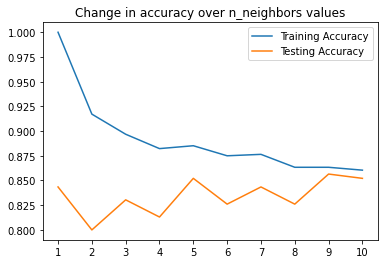

In [213]:
# plot change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(neighbors, train_scores, label = 'Training Accuracy')
ax.plot(neighbors, test_scores, label = 'Testing Accuracy')
ax.set_xticks(neighbors)
ax.set_title('Change in accuracy over n_neighbors values')
ax.legend()
# print dictionary of values of c and scores for test set
{n:score for n, score in zip(neighbors, test_scores)}

{1: 0.8257575757575758,
 2: 0.7121212121212122,
 3: 0.8484848484848485,
 4: 0.7727272727272727,
 5: 0.8484848484848485,
 6: 0.7878787878787878,
 7: 0.8484848484848485,
 8: 0.7954545454545454,
 9: 0.8560606060606061,
 10: 0.8333333333333334}

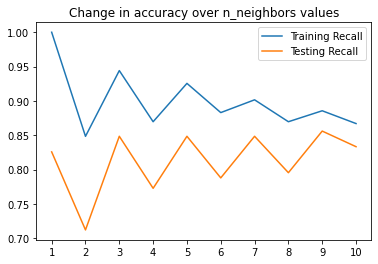

In [214]:
# plot change in recall as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(neighbors, train_recall, label = 'Training Recall')
ax.plot(neighbors, test_recall, label = 'Testing Recall')
ax.set_xticks(neighbors)
ax.set_title('Change in accuracy over n_neighbors values')
ax.legend()
# print dictionary of values of c and scores for test set
{n:recall for n, recall in zip(neighbors, test_recall)}

> A n_neighbors value of 9 provides the highest accuracy and recall scores of 85.7% and 85.6% respectively.

###### Optimized KNN Model with the Feature Engineered Dataframe

Training Data:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       312
           1       0.87      0.89      0.88       376

    accuracy                           0.86       688
   macro avg       0.86      0.86      0.86       688
weighted avg       0.86      0.86      0.86       688


Testing Data:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        98
           1       0.89      0.86      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230


Test Confusion Matrix:


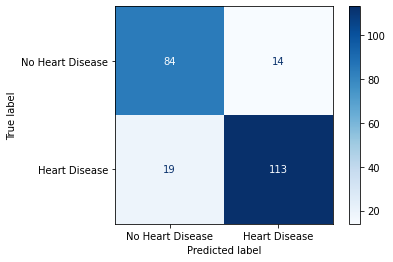

In [215]:
# instantiate optimized model, create pipeline, and fit to training data
knn_eng = KNeighborsClassifier(n_neighbors=9)
knn_eng_pipe=make_pipeline(preprocessor_scaled, knn_eng)
knn_eng_pipe.fit(X_eng_train, y_eng_train)
# evaluate model performance
evaluate_eng_model(knn_eng_pipe)

##### Random Forest Model

###### GridSearchCV

I'll start by executing a GridSearchCV on the random forest model to see if the optimized values for max_depth and n_estimators is still the same with the feature engineered dataframe as without.

In [216]:
# instantiate random forest classifier model
rf_eng = RandomForestClassifier(random_state=42)
# instantiate new training data that is put through the preprocessor
# for use in the grid search
X_eng_train_processed = preprocessor_scaled.fit_transform(X_eng_train)

# Create parameter grid for GridSearchCV
param_grid = {'max_depth': range(1,rf_depth),
              'n_estimators': [50, 100, 150, 200]}

# instantiate GridSearchCV
rf_grid_search = GridSearchCV(rf_eng, param_grid)
# fit grid search to training data
rf_grid_search.fit(X_eng_train_processed, y_eng_train)
# examine best parameters found by search
rf_grid_search.best_params_

{'max_depth': 14, 'n_estimators': 150}

> The best max_depth and n_estimators with the engineered feautres is vastly different than without the engineered features. I will check the model performance with these new values and the dataframe with feature engineering.

###### Optimized RF Model using Feature Engineered Dataframe

Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       376

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688


Testing Data:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230


Test Confusion Matrix:


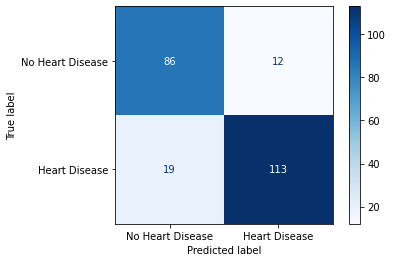

In [217]:
# instantiate rf model for engineered features dataframe
rf_eng = RandomForestClassifier(random_state=42, max_depth=14,
                                n_estimators=150)
# make pipeline with scaled preprocessor and rf_eng
rf_eng_pipe = make_pipeline(preprocessor_scaled, rf_eng)
# fit to training data
rf_eng_pipe.fit(X_eng_train, y_eng_train)
# evaluate model performance
evaluate_eng_model(rf_eng_pipe)

> My dataframe with engineered features led to a worse performing random forest model than the dataframe with the original values and features.

##### Summary of Feature Engineered Dataframe

None of the optimized models utilizing the feature engineered dataframe out performed those without the feature engineered data. 

## Comparison of Two Best Models

### Reinitialize and retrain optimum models

I am doing this step to ensure that the models being compared are accurate, since so much has happened in the code above. 

In [218]:
# instantiate random forest model with max_depth=7 and n_estimators=69
rf=RandomForestClassifier(random_state=42, max_depth=7,
                          n_estimators=69)
rf_pipe = make_pipeline(preprocessor_scaled, rf)
rf_pipe.fit(X_train, y_train);

In [219]:
# instantiate PCA object that will retain var of the variance when transforming
pca = PCA(n_components=0.93)
# combine preprocessor and pca in pipeline
pca_pipe = make_pipeline(preprocessor_scaled, pca)

# instantiate random forest model with max_depth=7 and n_estimators=69
rf_pca=RandomForestClassifier(random_state=42, max_depth=7,
                          n_estimators=69)
# create pipeline with optimal rf model and pca
rf_pca_pipe = make_pipeline(pca_pipe, rf_pca)
# fit to training data
rf_pca_pipe.fit(X_train, y_train);

### Compare Optimum Model Performance

The two best performing models were the Random Forest Classifier models with and without utilizing PCA.

Training Data:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       312
           1       0.93      0.96      0.94       376

    accuracy                           0.94       688
   macro avg       0.94      0.94      0.94       688
weighted avg       0.94      0.94      0.94       688


Testing Data:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        98
           1       0.92      0.90      0.91       132

    accuracy                           0.90       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230


Test Confusion Matrix:


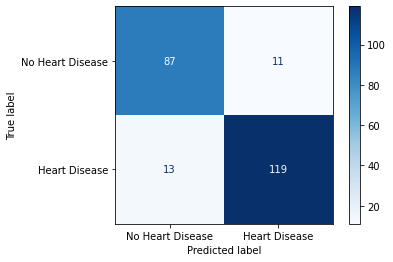

In [220]:
# look at rf model performance without pca
evaluate_model(rf_pipe) 

Training Data:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       312
           1       0.96      0.97      0.97       376

    accuracy                           0.96       688
   macro avg       0.96      0.96      0.96       688
weighted avg       0.96      0.96      0.96       688


Testing Data:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        98
           1       0.90      0.91      0.91       132

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230


Test Confusion Matrix:


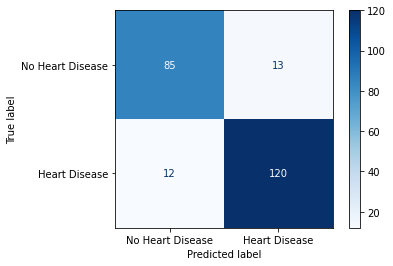

In [221]:
# look at rf model performance with pca
evaluate_model(rf_pca_pipe)

> The random forest model utilizing PCA achieved one less false negative, and two more false positives than the random forest model without PCA. This led to a slightly lower overall accuracy for the PCA model, however a slightly better recall score. The model utilizing PCA also had higher accuracy and recall scores on the training data than the model without PCA.

## Choosing a "Production" Model

Since I prioritize minimizing type 2 errors, the random forest model trained with PCA is better performing than that without PCA. The type 2 errors are the errors in which a patient with heart disease is predicted to not have a heart disease. A patient being given a false negative prognosis will preclude them from receiving treatment they may otherwise need to save their life. 

The random forest model trained without PCA did have one less error overall than the model utilizing PCA. However, it had one more of the type 2 errors, or false negative, errors. 

